In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Auto_BeLMS import AutoBelms as abl
from Auto_BeLMS.MyKNNClassifier import MyKNNClassifier
from Auto_BeLMS.MyLogisticRegression import MyLogisticRegression
from Auto_BeLMS.MyLinearSVM import MyLinearSVM
from Auto_BeLMS.MySVM import MySVM
from Auto_BeLMS.MyLinearRegression import MyLinearRegression
from Auto_BeLMS.MyKNNRegressor import MyKNNRegressor
from Auto_BeLMS.MyDecisionTreeClassifier import MyDecisionTreeClassifier
from Auto_BeLMS.MyDecisionTreeRegressor import MyDecisionTreeRegressor

E:\Documents\MSDS\Term 2\ML1\Auto_BeLMS\AutoBelms.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
df = pd.read_table('fruit_data_with_colors.txt')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
X = df.iloc[:, 3:]
y = df.iloc[:, 0]

## Simulator

In [4]:
models = abl.classifier_models
models['KNN Classifier']['n_jobs'] = -1
# models['Logistic Regression L1']['n_jobs'] = -1


Training KNN Classifier



21.82497811317444 seconds


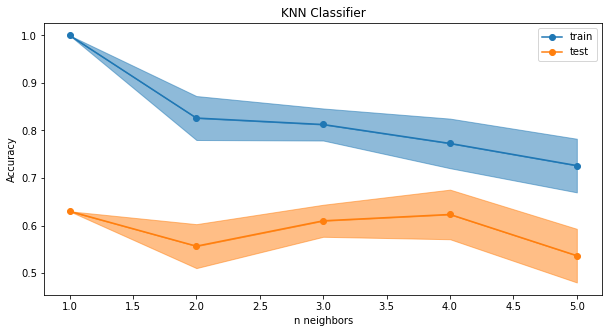

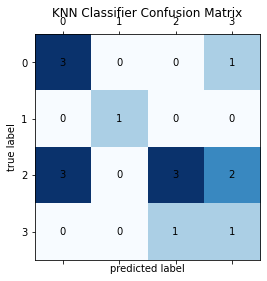

Training Logistic Regression L1



2.286088466644287 seconds


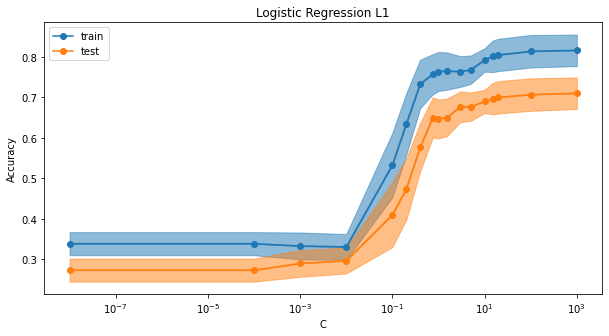

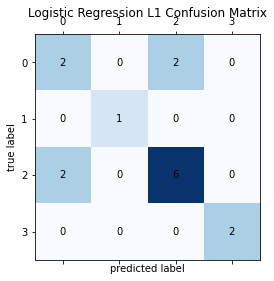

Training Logistic Regression L2



43.553568840026855 seconds


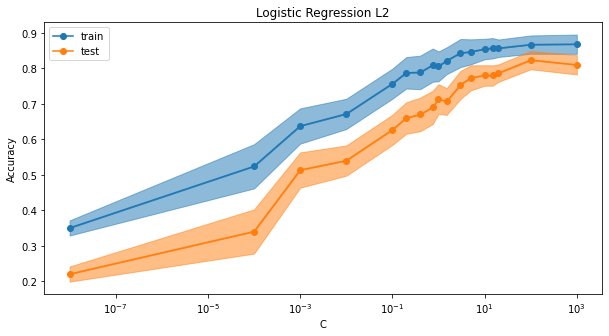

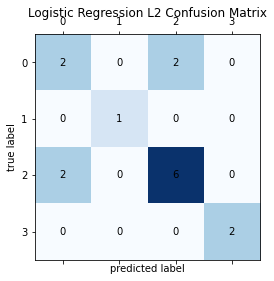

Training Linear SVM L1



1.890641689300537 seconds


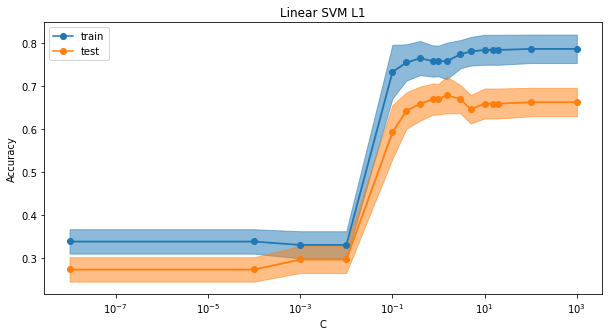

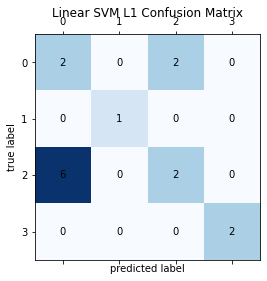

Training Linear SVM L2



2.853325366973877 seconds


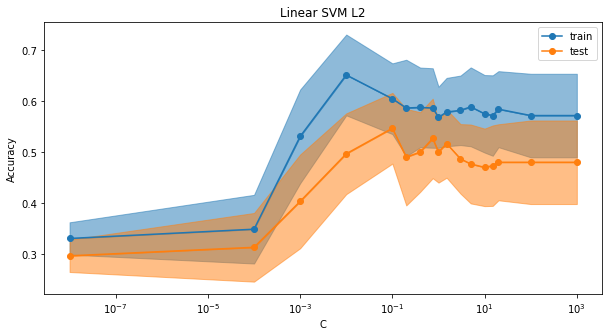

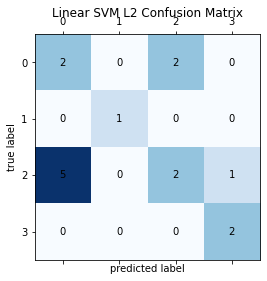

Training Non-Linear SVM RBF



1.8201172351837158 seconds


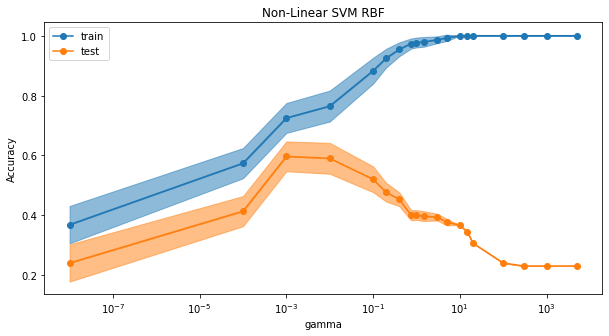

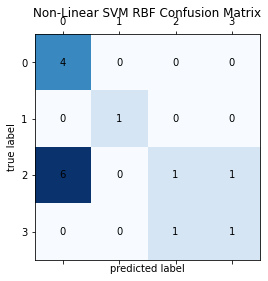

Training Decision Tree Classifier



0.3471088409423828 seconds


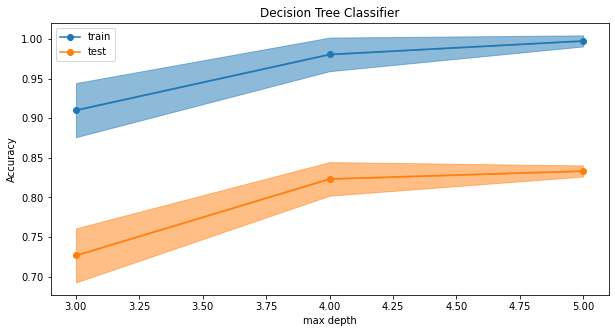

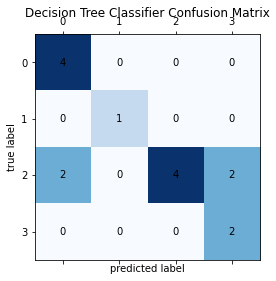

,Model,Best Parameter,Accuracy,Top Predictor,Train Time
0,KNN Classifier,n neighbors = 4,0.623333,mass,21.824978
1,Logistic Regression L1,C = 1000.0,0.710000,height,2.286088
2,Logistic Regression L2,C = 100.0,0.823333,mass,43.553569
3,Linear SVM L1,C = 1.5,0.680000,height,1.890642
4,Linear SVM L2,C = 0.1,0.546667,width,2.853325
5,Non-Linear SVM RBF,gamma = 0.001,0.596667,mass,1.820117
6,Decision Tree Classifier,max depth = 5,0.833333,width,0.347109


In [5]:
abl.simulate_classifiers(X, y, abl.classifier_models, figsize=(10,5), confmat=True)

## KNN 

In [4]:
knn = MyKNNClassifier()

In [5]:
df_train, df_test = knn.train_model(X, y, n_jobs=-1)

In [ ]:
ax = plt.gca()
knn.create_errorband_axes(ax=ax)
ax.set_xlabel(knn.setting)

In [8]:
knn.get_toppredictors()

,score
mass,0.642424
width,0.627273
height,0.524242
color_score,0.440909


In [9]:
knn.get_bestparameter()

4

{'confmat': array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [4, 0, 3, 1],
        [1, 0, 0, 4]], dtype=int64),
 'report':               precision   recall  f1-score  support
 1              0.166667  1.00000  0.285714      1.0
 2              1.000000  1.00000  1.000000      1.0
 3              1.000000  0.37500  0.545455      8.0
 4              0.800000  0.80000  0.800000      5.0
 accuracy       0.600000  0.60000  0.600000      0.6
 macro avg      0.741667  0.79375  0.657792     15.0
 weighted avg   0.877778  0.60000  0.643290     15.0,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x2353ff6bbc8>}

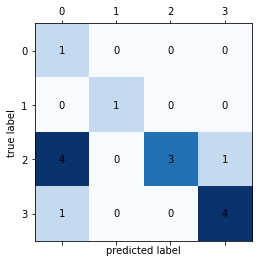

In [10]:
knn.get_metric(ax=plt.gca())

## Logistic Regression

In [4]:
log = MyLogisticRegression(10)

In [5]:
df_train, df_test = log.train_model(X, y)

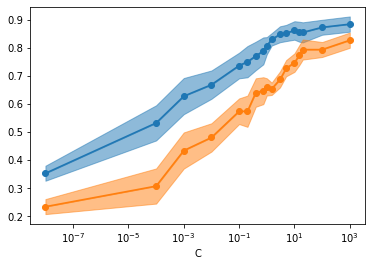

In [6]:
ax = plt.gca()
log.create_errorband_axes(ax=ax)
ax.set_xlabel(log.setting)
ax.set_xscale('log')

In [7]:
log.get_toppredictors()

,weight
width,3.706264e-13
height,1.903053e-13
mass,1.553041e-13
color_score,1.212821e-14


In [8]:
log.get_bestparameter()

1000.0

{'confmat': array([[3, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 6, 0],
        [0, 0, 0, 4]], dtype=int64),
 'report':               precision    recall  f1-score    support
 1              1.000000  0.750000  0.857143   4.000000
 2              1.000000  1.000000  1.000000   1.000000
 3              0.857143  1.000000  0.923077   6.000000
 4              1.000000  1.000000  1.000000   4.000000
 accuracy       0.933333  0.933333  0.933333   0.933333
 macro avg      0.964286  0.937500  0.945055  15.000000
 weighted avg   0.942857  0.933333  0.931136  15.000000,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x2943527c348>}

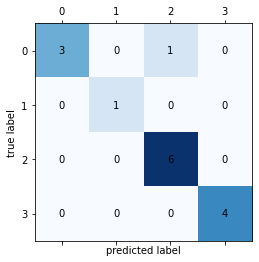

In [9]:
log.get_metric(ax=plt.gca())

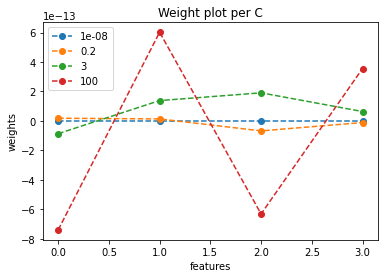

In [10]:
ax = plt.gca()
log.create_weightplot_axes(log.clist[::5], ax)
ax.set_xlabel('features')
ax.set_ylabel('weights')
ax.set_title('Weight plot per C')
plt.legend()

## Linear SVM

In [11]:
lsvm = MyLinearSVM(10)

In [12]:
df_train, df_test = lsvm.train_model(X, y)

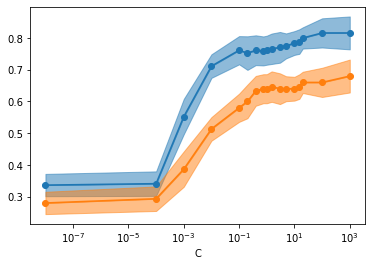

In [13]:
ax = plt.gca()
lsvm.create_errorband_axes(ax=ax)
ax.set_xlabel(lsvm.setting)
ax.set_xscale('log')

In [14]:
lsvm.get_toppredictors()

,weight
height,0.241010
color_score,0.240974
width,0.082785
mass,0.014918


In [15]:
lsvm.get_bestparameter()

1000.0

{'confmat': array([[4, 0, 1, 0],
        [0, 2, 0, 0],
        [1, 0, 3, 0],
        [0, 0, 0, 4]], dtype=int64),
 'report':               precision    recall  f1-score    support
 1              0.800000  0.800000  0.800000   5.000000
 2              1.000000  1.000000  1.000000   2.000000
 3              0.750000  0.750000  0.750000   4.000000
 4              1.000000  1.000000  1.000000   4.000000
 accuracy       0.866667  0.866667  0.866667   0.866667
 macro avg      0.887500  0.887500  0.887500  15.000000
 weighted avg   0.866667  0.866667  0.866667  15.000000,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x29435563848>}

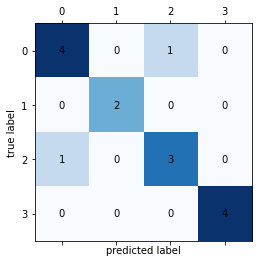

In [16]:
lsvm.get_metric(ax=plt.gca())

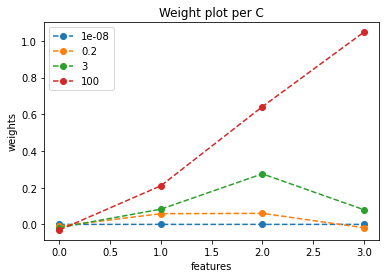

In [17]:
ax = plt.gca()
lsvm.create_weightplot_axes(lsvm.clist[::5], ax)
ax.set_xlabel('features')
ax.set_ylabel('weights')
ax.set_title('Weight plot per C')
plt.legend()

## Non Linear SVM

In [23]:
svm = MySVM(10)

In [24]:
df_train, df_test = svm.train_model(X, y, kernel='rbf', degree=3, max_iter=1000, coef0=0.0, random_state=0)

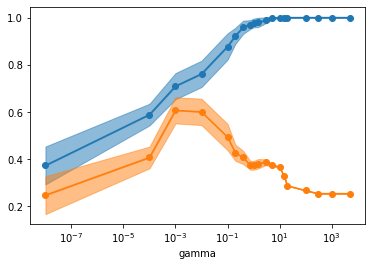

In [25]:
ax = plt.gca()
svm.create_errorband_axes(ax=ax)
ax.set_xlabel(svm.setting)
ax.set_xscale('log')

In [26]:
svm.get_toppredictors()

,score
mass,0.559091
width,0.371212
height,0.321212
color_score,0.287879


In [27]:
svm.get_bestparameter()

0.001

{'confmat': array([[1, 1, 0],
        [2, 4, 0],
        [3, 1, 3]], dtype=int64),
 'report':               precision    recall  f1-score    support
 1              0.166667  0.500000  0.250000   2.000000
 3              0.666667  0.666667  0.666667   6.000000
 4              1.000000  0.428571  0.600000   7.000000
 accuracy       0.533333  0.533333  0.533333   0.533333
 macro avg      0.611111  0.531746  0.505556  15.000000
 weighted avg   0.755556  0.533333  0.580000  15.000000,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x235411e6048>}

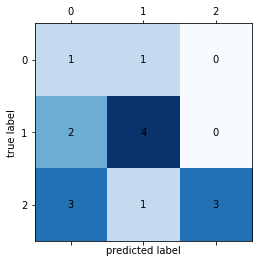

In [28]:
svm.get_metric(ax=plt.gca())

## Decision Trees Classifier

In [4]:
tree = MyDecisionTreeClassifier(10)

In [5]:
df_train, df_test = tree.train_model(X, y, random_state=0)

Text(0.5, 0, 'max depth')

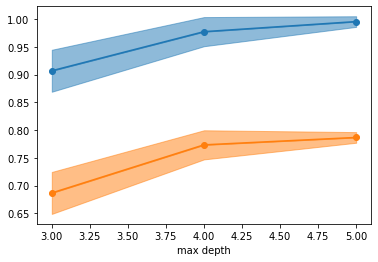

In [6]:
ax = plt.gca()
tree.create_errorband_axes(ax=ax)
ax.set_xlabel(tree.setting)

In [7]:
tree.get_toppredictors()

,score
width,0.520816
height,0.214409
color_score,0.156909
mass,0.107866


In [9]:
tree.get_bestparameter()

5

{'confmat': array([[6, 0, 1],
        [0, 1, 0],
        [0, 1, 6]], dtype=int64),
 'report':               precision    recall  f1-score    support
 1              1.000000  0.857143  0.923077   7.000000
 3              0.500000  1.000000  0.666667   1.000000
 4              0.857143  0.857143  0.857143   7.000000
 accuracy       0.866667  0.866667  0.866667   0.866667
 macro avg      0.785714  0.904762  0.815629  15.000000
 weighted avg   0.900000  0.866667  0.875214  15.000000,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x1d0940859c8>}

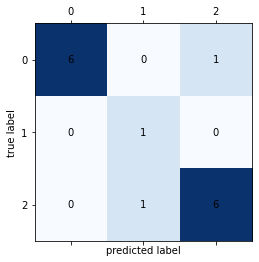

In [10]:
tree.get_metric(ax=plt.gca())

# Regression

## Linear Regression

In [6]:
import mglearn

In [7]:
X, y = X, y = mglearn.datasets.load_extended_boston()
X, y = pd.DataFrame(X), pd.DataFrame(y)

## Simulation

Training Lasso Regression L1



13.554267883300781 seconds


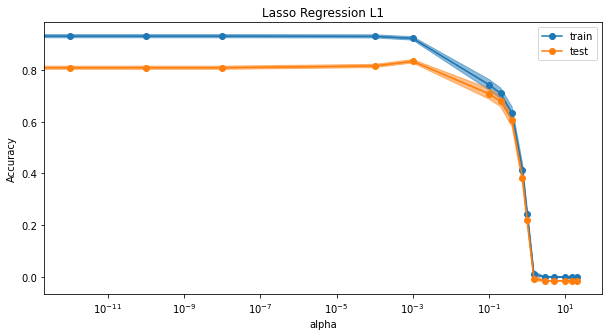

Training Ridge Regression L2



5.747661590576172 seconds


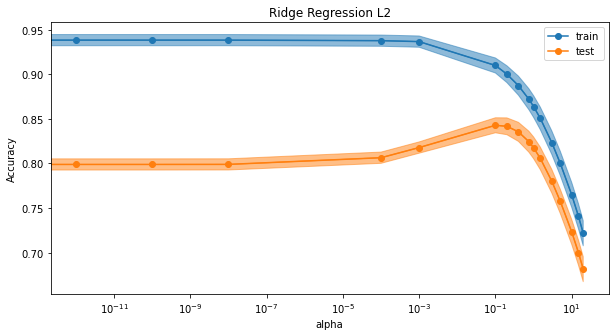

Training KNN Regression



22.48914074897766 seconds


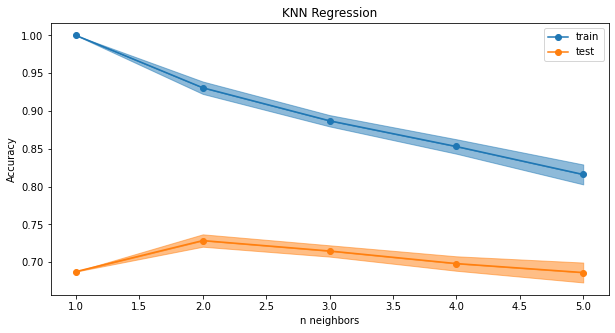

Training Decision Tree Regression



0.9760003089904785 seconds


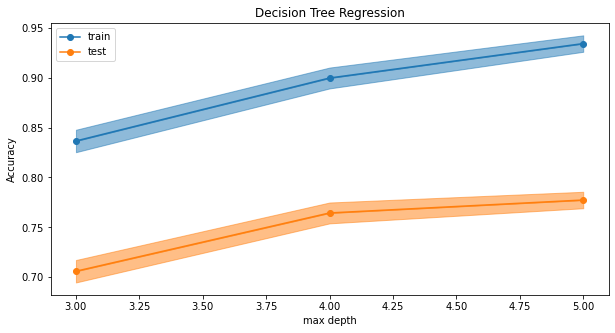

,Model,Best Parameter,Accuracy,Top Predictor,Train Time
0,Lasso Regression L1,alpha = 0.001,0.833210,14,13.554268
1,Ridge Regression L2,alpha = 0.1,0.842816,3,5.747662
2,KNN Regression,n neighbors = 3,0.714744,100,22.489141
3,Decision Tree Regression,max depth = 5,0.777371,100,0.976000


In [8]:
abl.simulate_regressor(X, y, abl.regression_models, figsize=(10,5))

## Ridge Regression

In [20]:
lreg = MyLinearRegression(10)
df_train, df_test = lreg.train_model(X, y)

C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.21992e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\abelj\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.1678e-18): result may not be accurate.
  overwrite_a=True).T


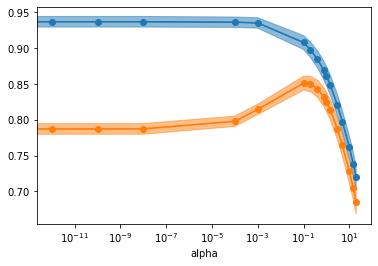

In [21]:
ax = plt.gca()
lreg.create_errorband_axes(ax=ax)
ax.set_xlabel(lreg.setting)
ax.set_xscale('log')

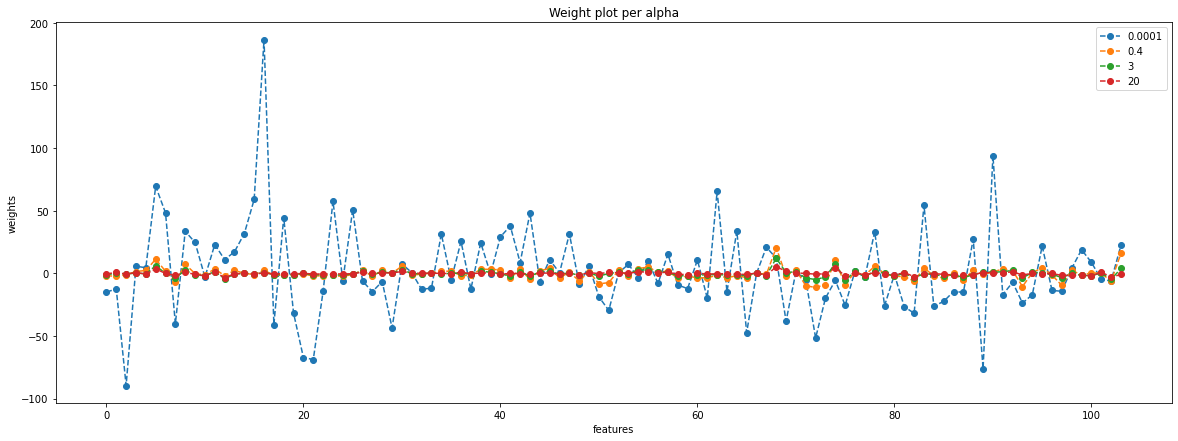

In [26]:
plt.figure(figsize=(20,7))
ax = plt.gca()
lreg.create_weightplot_axes(lreg.alist[4::4], ax)
ax.set_xlabel('features')
ax.set_ylabel('weights')
ax.set_title('Weight plot per alpha')
plt.legend()

## Lasso Regression

In [6]:
lreg = MyLinearRegression(10)
df_train, df_test = lreg.train_model(X, y, regularizer='l1')

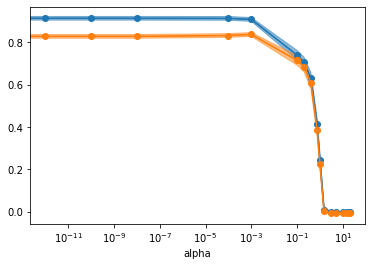

In [7]:
ax = plt.gca()
lreg.create_errorband_axes(ax=ax)
ax.set_xlabel(lreg.setting)
ax.set_xscale('log')

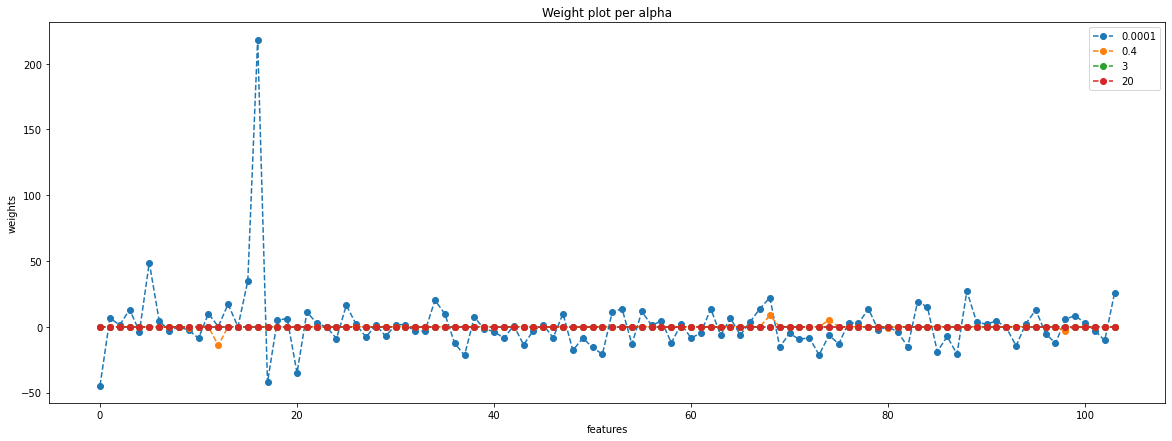

In [8]:
plt.figure(figsize=(20,7))
ax = plt.gca()
lreg.create_weightplot_axes(lreg.alist[4::4], ax)
ax.set_xlabel('features')
ax.set_ylabel('weights')
ax.set_title('Weight plot per alpha')
plt.legend()

## KNN Regression

In [12]:
knnreg = MyKNNRegressor(10)
df_train, df_test = knnreg.train_model(X, y, n_jobs=-1)

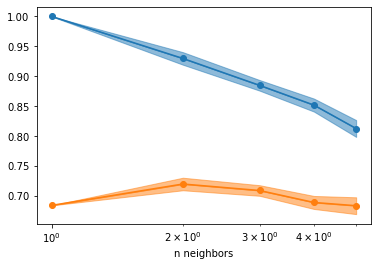

In [13]:
ax = plt.gca()
knnreg.create_errorband_axes(ax=ax)
ax.set_xlabel(knnreg.setting)
ax.set_xscale('log')

## Decision Tree Regression

In [6]:
tree = MyDecisionTreeRegressor(10)
df_train, df_test = tree.train_model(X, y)

Text(0.5, 0, 'max depth')

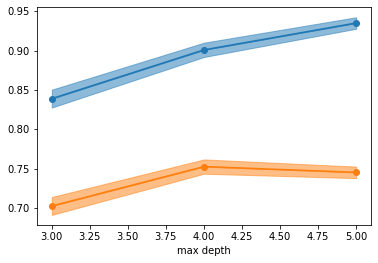

In [8]:
ax = plt.gca()
tree.create_errorband_axes(ax=ax)
ax.set_xlabel(tree.setting)